In [1]:
import hdbscan
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

### NaturDoc - TL BL WT 22-23

# Data Visualisation:

## Loading Necessary Data:

In [2]:
symptoms_embeddings = pd.read_csv("../data/embeddings/word_embeddings_dataframe.csv")

We can use this dictionary to later match the terms to their ids:

In [3]:
dict_symptom = symptoms_embeddings["Symptom"].to_dict()

### Running Embedding Transformation Code:

In [4]:
def listify_df_values(df_series: pd.Series):
    df_series = df_series.str.replace("\n", "", regex=True)
    df_series = df_series.str.replace("[", "", regex=True).replace("]", "", regex=True)
    df_series = df_series.str.split(" ")
    return df_series

In [5]:
embeddings1_series = listify_df_values(symptoms_embeddings.loc[:, "Embedding1"])
embeddings1_series = embeddings1_series.apply(lambda row: [val for val in row if val])

In [6]:
embeddings1_df = pd.DataFrame(embeddings1_series)
embeddings1_df = pd.concat(
    [embeddings1_df[c].apply(pd.Series).add_prefix(c + "_") for c in embeddings1_df], axis=1
)

embeddings1_df

Embedding1_0     Embedding1_1     Embedding1_2     Embedding1_3  \
0     -9.81967244e-03   1.01662287e-02   3.75229940e-02   1.75703913e-02   
1      5.98840415e-02   1.64022837e-02  -4.90665212e-02   4.81191762e-02   
2      6.30832557e-03   6.94514960e-02   9.17118881e-03  -4.25593607e-04   
3     -1.41132241e-02   7.76526034e-02  -8.35783686e-03   2.37053819e-02   
4     -7.86128864e-02  -2.58876905e-02   3.46109122e-02   5.58277592e-02   
...               ...              ...              ...              ...   
2399  -1.92209315e-02   3.93610820e-02  -8.05331487e-03  -1.88839864e-02   
2400   2.64672562e-02  -4.77555906e-03  -3.02140005e-02  -2.61425432e-02   
2401   2.54991353e-02   1.67390481e-02   5.45178875e-02  -1.12884091e-02   
2402  -4.97031994e-02   1.04058813e-02   1.57771539e-02   7.78019577e-02   
2403   2.60038115e-02  -7.01556401e-03  -2.84907389e-02   3.80175486e-02   

         Embedding1_4     Embedding1_5    Embedding1_6     Embedding1_7  \
0     -1.11436069e-01   3.83325890e-02  1.48906738e-01   4.44466770e-02   
1     -9.69780684e-02  -1.16978601e-01  1.07039817e-01   2.18950473e-02   
2      3.68529968e-02   2.88750455e-02  9.93606523e-02   1.99077209e-03   
3      5.61783165e-02   3.36992592e-02  1.19458653e-01  -2.01092865e-02   
4     -3.87978852e-02  -5.56877032e-02  1.44394651e-01   2.46080924e-02   
...               ...              ...             ...              ...   
2399   1.07821608e-02  -7.60535970e-02  1.06595382e-01   5.58597855e-02   
2400  -3.36900353e-02  -1.13033682e-01  8.00898746e-02   5.02843335e-02   
2401   2.85636671e-02  -5.56535311e-02  5.83849624e-02  -4.70371544e-03   
2402   4.29792143e-03   1.63108837e-02  7.65634999e-02   1.36114378e-02   
2403  -1.65998936e-02  -1.13059320e-02  1.39509425e-01   6.60351515e-02   

         Embedding1_8     Embedding1_9  ...   Embedding1_374   Embedding1_375  \
0      5.77533916e-02  -1.21526700e-02  ...   6.11344092e-02   1.98782869e-02   
1      4.59282361e-02  -6.05028607e-02  ...   4.86743562e-02   1.04232021e-02   
2      3.11414283e-02   3.83325480e-02  ...   2.25946605e-02  -3.91616262e-02   
3      3.62723432e-02   4.82863858e-02  ...   6.69673532e-02   1.13059739e-02   
4     -7.19921589e-02  -4.99793142e-02  ...   2.83698123e-02  -3.49769071e-02   
...               ...              ...  ...              ...              ...   
2399  -2.49612960e-04  -1.84704605e-02  ...   2.31999531e-02   5.51964119e-02   
2400  -1.70364957e-02   1.48580121e-02  ...  -1.41694313e-02   6.69747815e-02   
2401   9.25000161e-02  -4.64275433e-03  ...   2.22304687e-02   3.83732654e-02   
2402  -5.57998866e-02   2.25542802e-02  ...  -9.64850485e-02   9.33009025e-04   
2403   2.80970801e-02  -6.09905124e-02  ...   5.04387170e-02  -3.72295007e-02   

       Embedding1_376   Embedding1_377   Embedding1_378   Embedding1_379  \
0      1.33477971e-02   3.86779606e-02  -4.79677059e-02   3.42200510e-02   
1      1.38152717e-02  -5.32790925e-03  -1.77161284e-02   1.04324900e-01   
2      1.23729361e-02  -2.83677857e-02  -8.51575360e-02   7.25132674e-02   
3     -1.16295973e-02  -2.42045093e-02  -5.78260906e-02   3.89332138e-02   
4     -2.14673597e-02   1.45020243e-02   5.76726533e-02   3.32759731e-02   
...               ...              ...              ...              ...   
2399  -1.61917768e-02   6.19558468e-02  -2.18066014e-02   1.71804782e-02   
2400   6.27062470e-02   1.41177222e-01  -7.76808560e-02   6.27785251e-02   
2401  -2.88097896e-02  -6.03646785e-03  -7.98023343e-02  -1.62580740e-02   
2402   5.58457756e-03   3.17276493e-02   1.84024610e-02  -2.05374248e-02   
2403   3.13002318e-02  -2.17731157e-03  -4.20867791e-03   5.10131158e-02   

       Embedding1_380   Embedding1_381   Embedding1_382   Embedding1_383  
0      4.26308662e-02   3.78118306e-02   6.95859119e-02  -4.20008637e-02  
1      9.65044126e-02   7.19451010e-02   1.72711313e-02   6.24693604e-03  
2      6.53430074e-02   2.26758630e-03   6.07209243e-02  -2.46002264e-02  
3      1.

In [7]:
embeddings1_df = embeddings1_df.apply(pd.to_numeric, errors='coerce')

In [8]:
embeddings1_df

Embedding1_0  Embedding1_1  Embedding1_2  Embedding1_3  Embedding1_4  \
0        -0.009820      0.010166      0.037523      0.017570     -0.111436   
1         0.059884      0.016402     -0.049067      0.048119     -0.096978   
2         0.006308      0.069451      0.009171     -0.000426      0.036853   
3        -0.014113      0.077653     -0.008358      0.023705      0.056178   
4        -0.078613     -0.025888      0.034611      0.055828     -0.038798   
...            ...           ...           ...           ...           ...   
2399     -0.019221      0.039361     -0.008053     -0.018884      0.010782   
2400      0.026467     -0.004776     -0.030214     -0.026143     -0.033690   
2401      0.025499      0.016739      0.054518     -0.011288      0.028564   
2402     -0.049703      0.010406      0.015777      0.077802      0.004298   
2403      0.026004     -0.007016     -0.028491      0.038018     -0.016600   

      Embedding1_5  Embedding1_6  Embedding1_7  Embedding1_8  Embedding1_9  \
0         0.038333      0.148907      0.044447      0.057753     -0.012153   
1        -0.116979      0.107040      0.021895      0.045928     -0.060503   
2         0.028875      0.099361      0.001991      0.031141      0.038333   
3         0.033699      0.119459     -0.020109      0.036272      0.048286   
4        -0.055688      0.144395      0.024608     -0.071992     -0.049979   
...            ...           ...           ...           ...           ...   
2399     -0.076054      0.106595      0.055860     -0.000250     -0.018470   
2400     -0.113034      0.080090      0.050284     -0.017036      0.014858   
2401     -0.055654      0.058385     -0.004704      0.092500     -0.004643   
2402      0.016311      0.076563      0.013611     -0.055800      0.022554   
2403     -0.011306      0.139509      0.066035      0.028097     -0.060991   

      ...  Embedding1_374  Embedding1_375  Embedding1_376  Embedding1_377  \
0     ...        0.061134        0.019878        0.013348        0.038678   
1     ...        0.048674        0.010423        0.013815       -0.005328   
2     ...        0.022595       -0.039162        0.012373       -0.028368   
3     ...        0.066967        0.011306       -0.011630       -0.024205   
4     ...        0.028370       -0.034977       -0.021467        0.014502   
...   ...             ...             ...             ...             ...   
2399  ...        0.023200        0.055196       -0.016192        0.061956   
2400  ...       -0.014169        0.066975        0.062706        0.141177   
2401  ...        0.022230        0.038373       -0.028810       -0.006036   
2402  ...       -0.096485        0.000933        0.005585        0.031728   
2403  ...        0.050439       -0.037230        0.031300       -0.002177   

      Embedding1_378  Embedding1_379  Embedding1_380  Embedding1_381  \
0          -0.047968        0.034220        0.042631        0.037812   
1          -0.017716        0.104325        0.096504        0.071945   
2          -0.085158        0.072513        0.065343        0.002268   
3          -0.057826        0.038933        0.118805       -0.029626   
4           0.057673        0.033276        0.109838       -0.075756   
...              ...             ...             ...             ...   
2399       -0.021807        0.017180        0.049000       -0.044214   
2400       -0.077681        0.062779        0.081698       -0.033658   
2401       -0.079802       -0.016258        0.017345       -0.054523   
2402        0.018402       -0.020537        0.048137       -0.007934   
2403       -0.004209        0.051013       -0.023446        0.013570   

      Embedding1_382  Embedding1_383  
0           0.069586       -0.042001  
1           0.017271        0.006247  
2           0.060721       -0.024600  
3           0.036952       -0.009537  
4           0.022305       -0.047095  
...              ...             ...  
2399        0.052794        0.018875  
2400        0.049893        0.

### Distance Matrix:

In [9]:
from scipy.spatial import distance_matrix
import math

In [10]:
def generate_distance_matrix(df : pd.DataFrame,
                distance_metric : str = "euclidean") -> pd.DataFrame: # 2.5k x 2.5k
    if distance_metric == "manhattan":
        p = 1
    elif distance_metric == "euclidean":
        p = 2
    elif distance_metric == "chebychev":
        p = math.inf
    else:
        p = 2
    dis_matrix = distance_matrix(df.values, df.values, p)
    dis_df = pd.DataFrame(dis_matrix)
    return dis_df

In [11]:
df_dist_1 = generate_distance_matrix(embeddings1_df)

## Visualising all clusters:

_Note: to reduce the file size of this notebook, we had to reduce the size of the visualisations. Image files in the original size can be found as .png files in the output-directory._

We use TSNE projection to visualise the multi-dimensional embeddings array in 2D space.

### Visualising All Symptom and Activity Names:

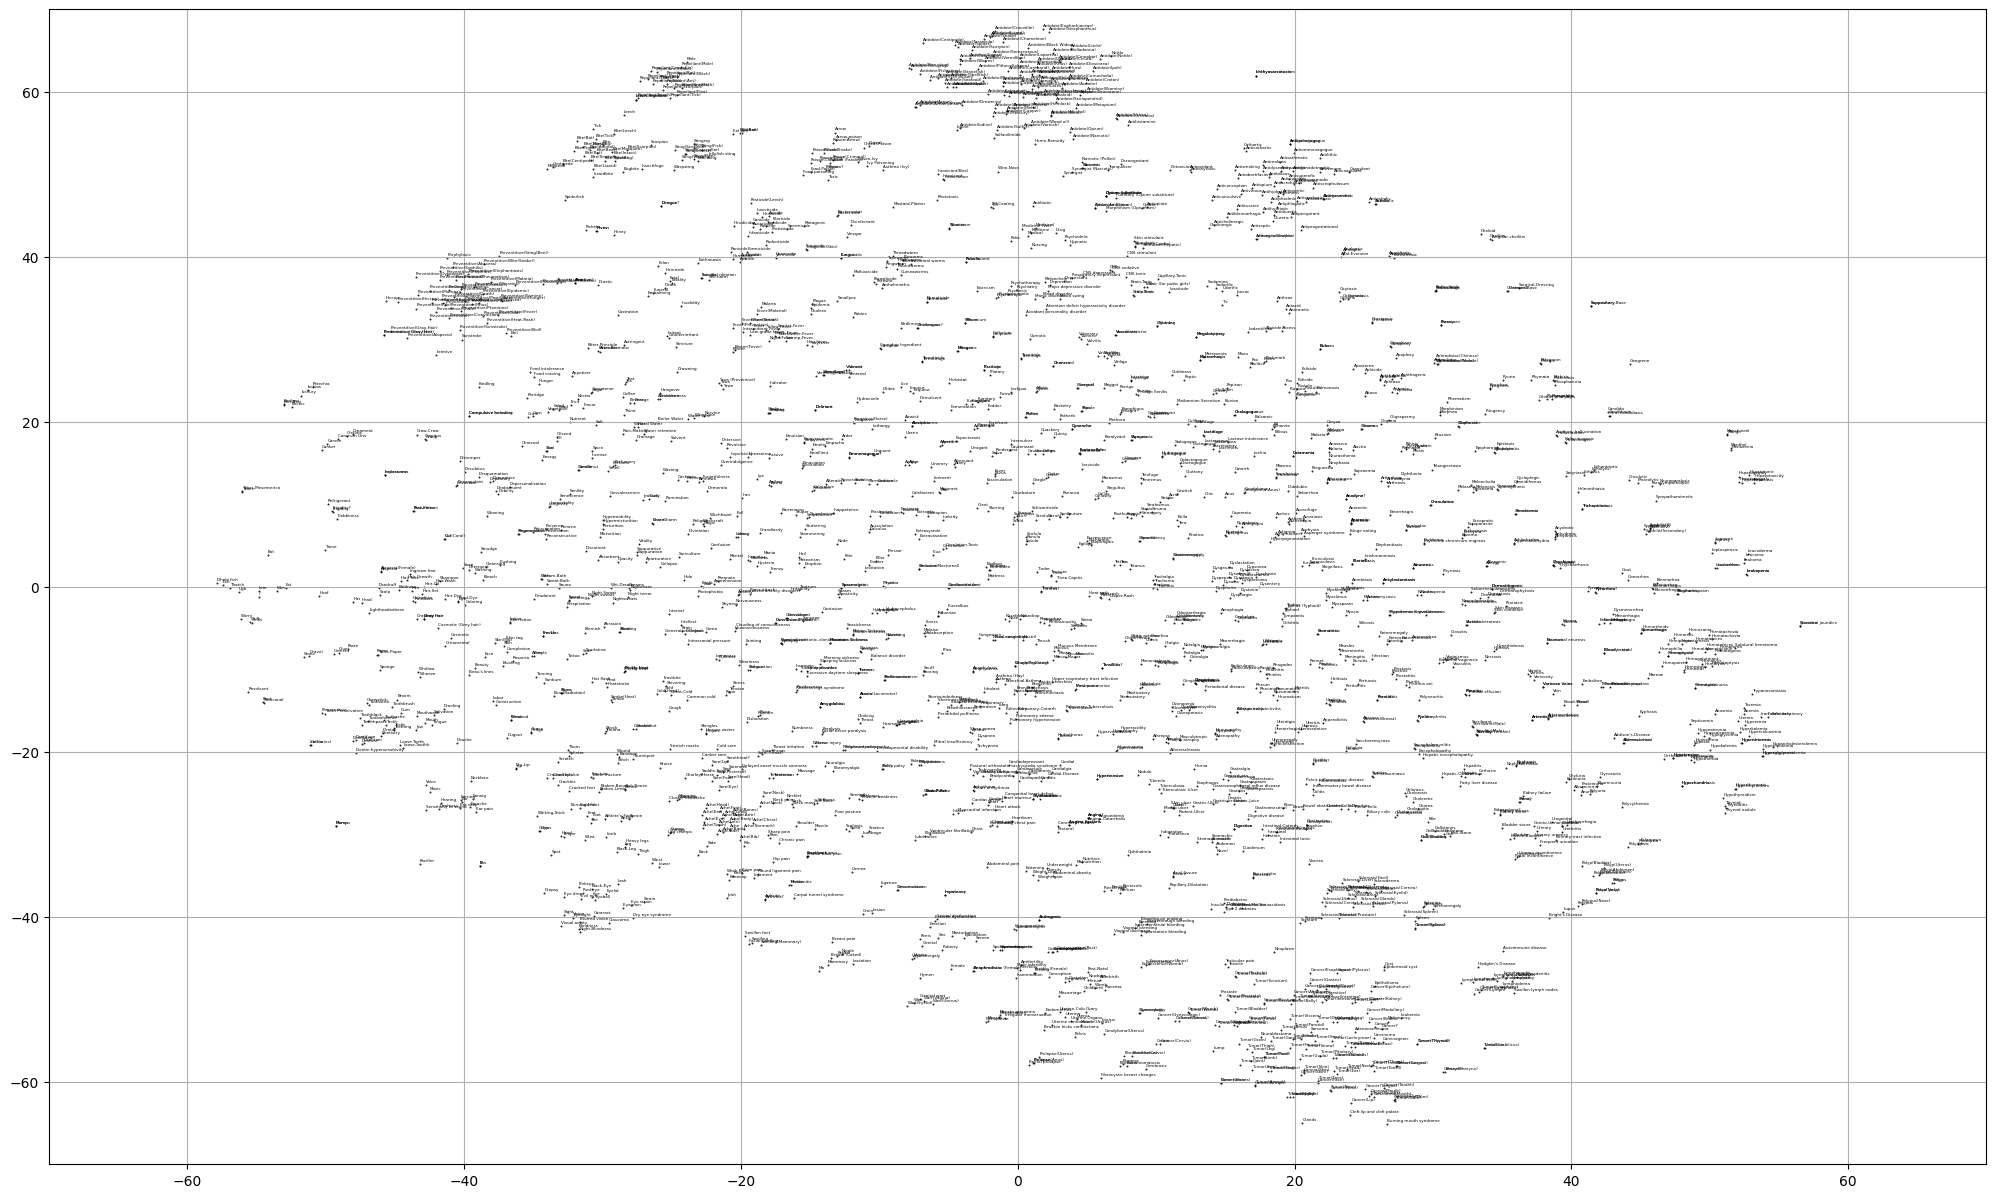

In [24]:
plt.figure(figsize=(25,15))
plt.grid(visible=True)

projection = TSNE().fit_transform(embeddings1_df)
clusterer = hdbscan.HDBSCAN(min_samples = 1, min_cluster_size=2, cluster_selection_epsilon=.75, prediction_data=True).fit(embeddings1_df)

plt.scatter(*projection.T, s=2, linewidth=0, c="black", alpha=0.85)

for i, coords in enumerate(projection):

    (x, y) = coords
    label = dict_symptom[i]

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,2), 
                 ha='left', 
                 fontsize=3)
    
plt.ylim(-70, 70)
plt.xlim(-70, 70)

plt.show()

### Initial Attempt with Soft Clustering:

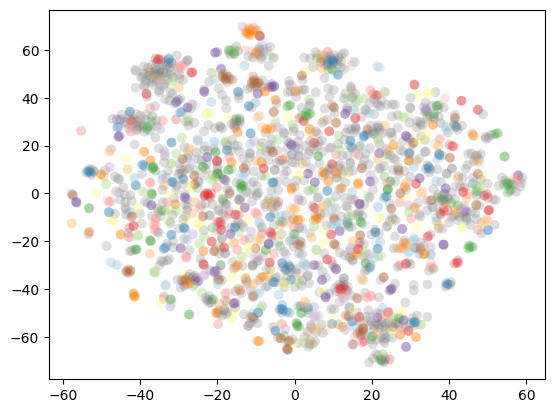

In [12]:
projection = TSNE().fit_transform(embeddings1_df)
clusterer = hdbscan.HDBSCAN(min_samples = 1, min_cluster_size=2, prediction_data=True).fit(embeddings1_df)
color_palette = sns.color_palette('Paired', 800)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

Maybe we should visualise larger clusters to sort of see how they get grouped in general?

We also annotate each data point with its name:

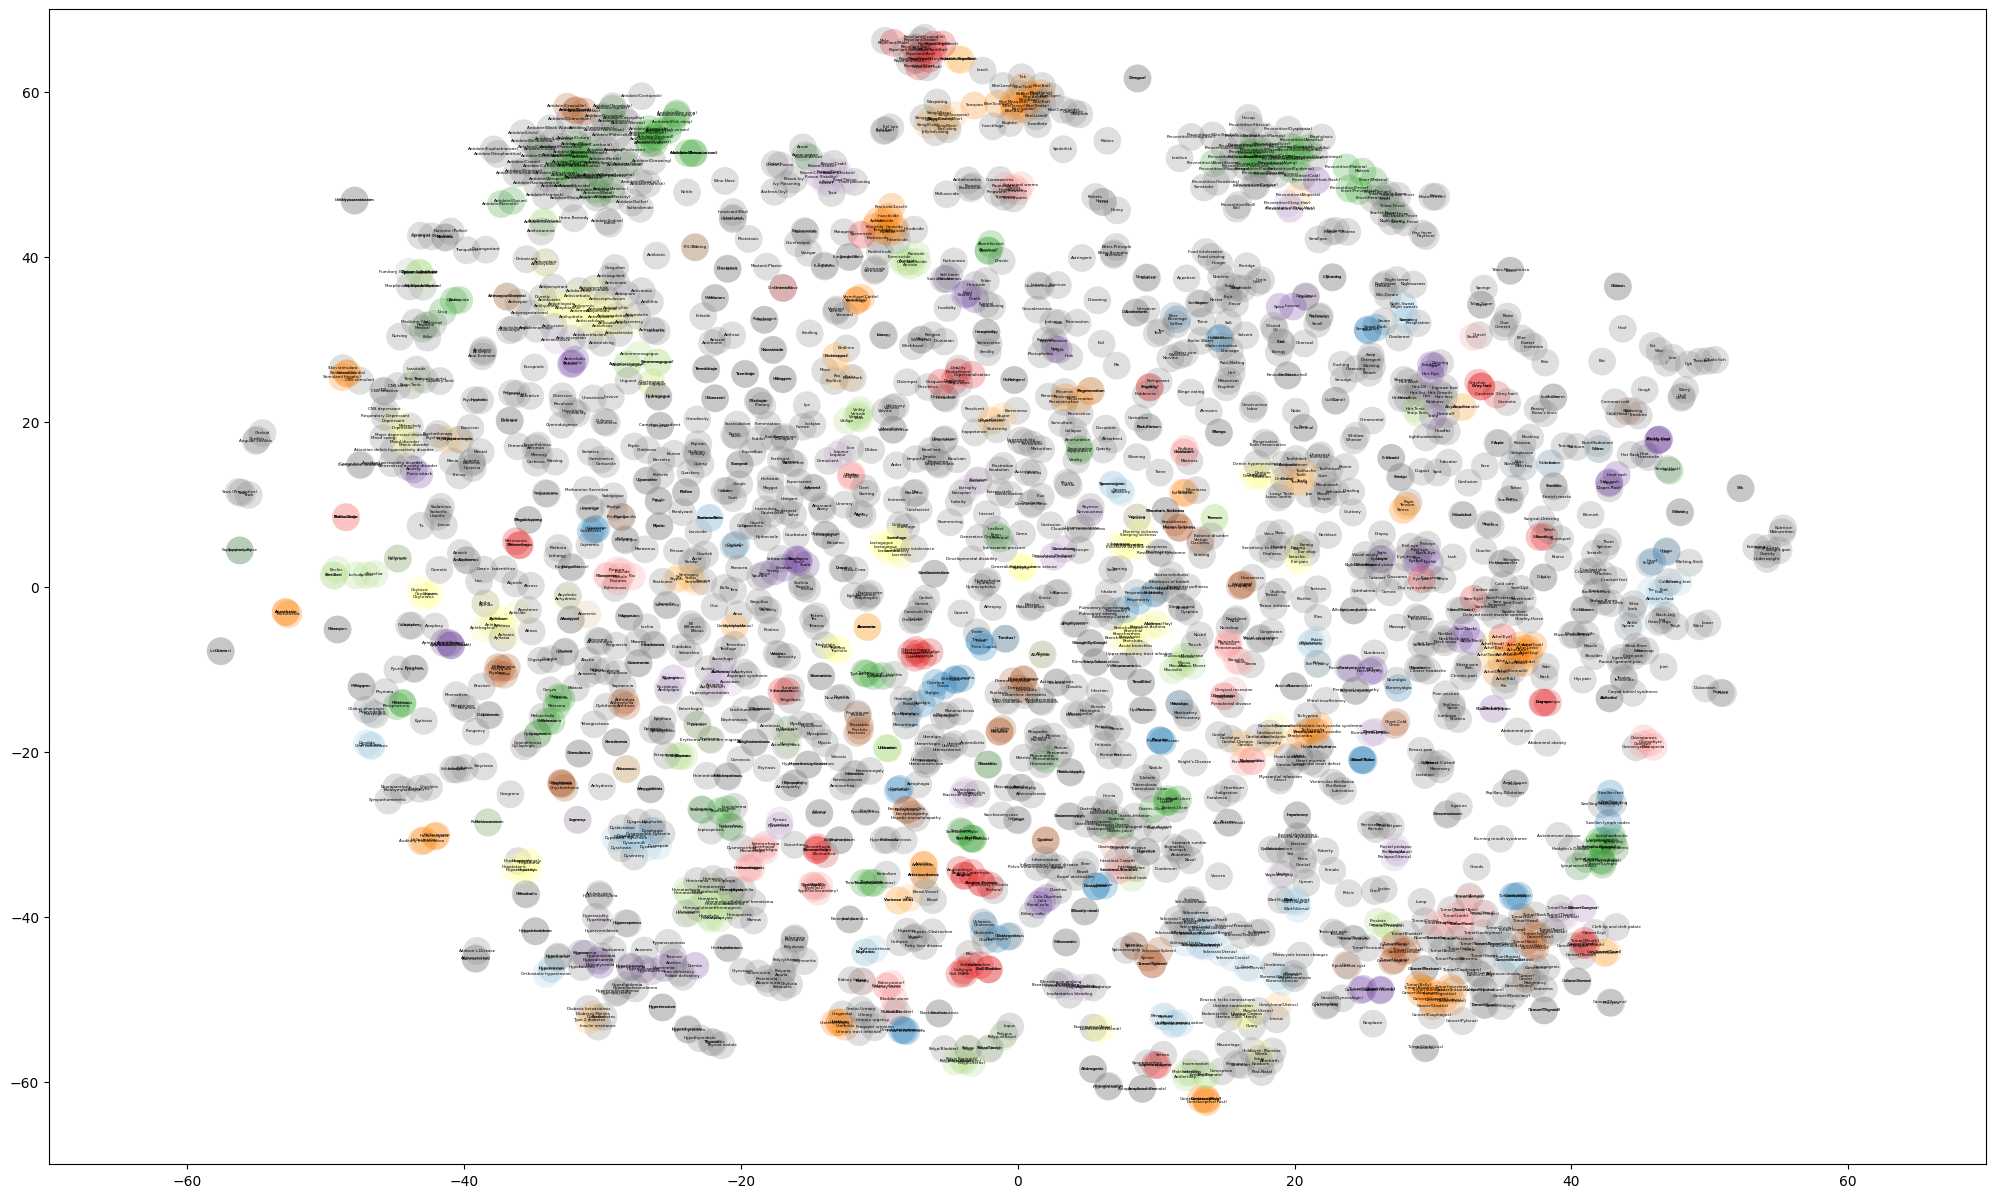

In [16]:
plt.figure(figsize=(25,15))

projection = TSNE().fit_transform(embeddings1_df)
clusterer = hdbscan.HDBSCAN(min_samples = 2, min_cluster_size=3, prediction_data=True).fit(embeddings1_df)
color_palette = sns.color_palette('Paired', 800)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

plt.scatter(*projection.T, s=400, linewidth=0, c=cluster_member_colors, alpha=0.25)

for i, coords in enumerate(projection):

    (x, y) = coords

    label = dict_symptom[i]

    plt.annotate(label, 
                 (x,y), 
                 ha='center', 
                 fontsize=3) 

plt.ylim(-70, 70)
plt.xlim(-70, 70)

plt.show()

These first attempts using the default soft clustering labels really do not seem to provide useful results - clusters seem almost random, although this could also be due to the fact that the 2D representation we see here was merely a projection.

### Attempt with Distance Matrix:

Try without soft clustering and distance matrix instead. We represent clusters connected by lines that join together in the centre of the cluster (note: there are no centroids, this is purely for the purpose of seeing the lines more easily connected to one another):

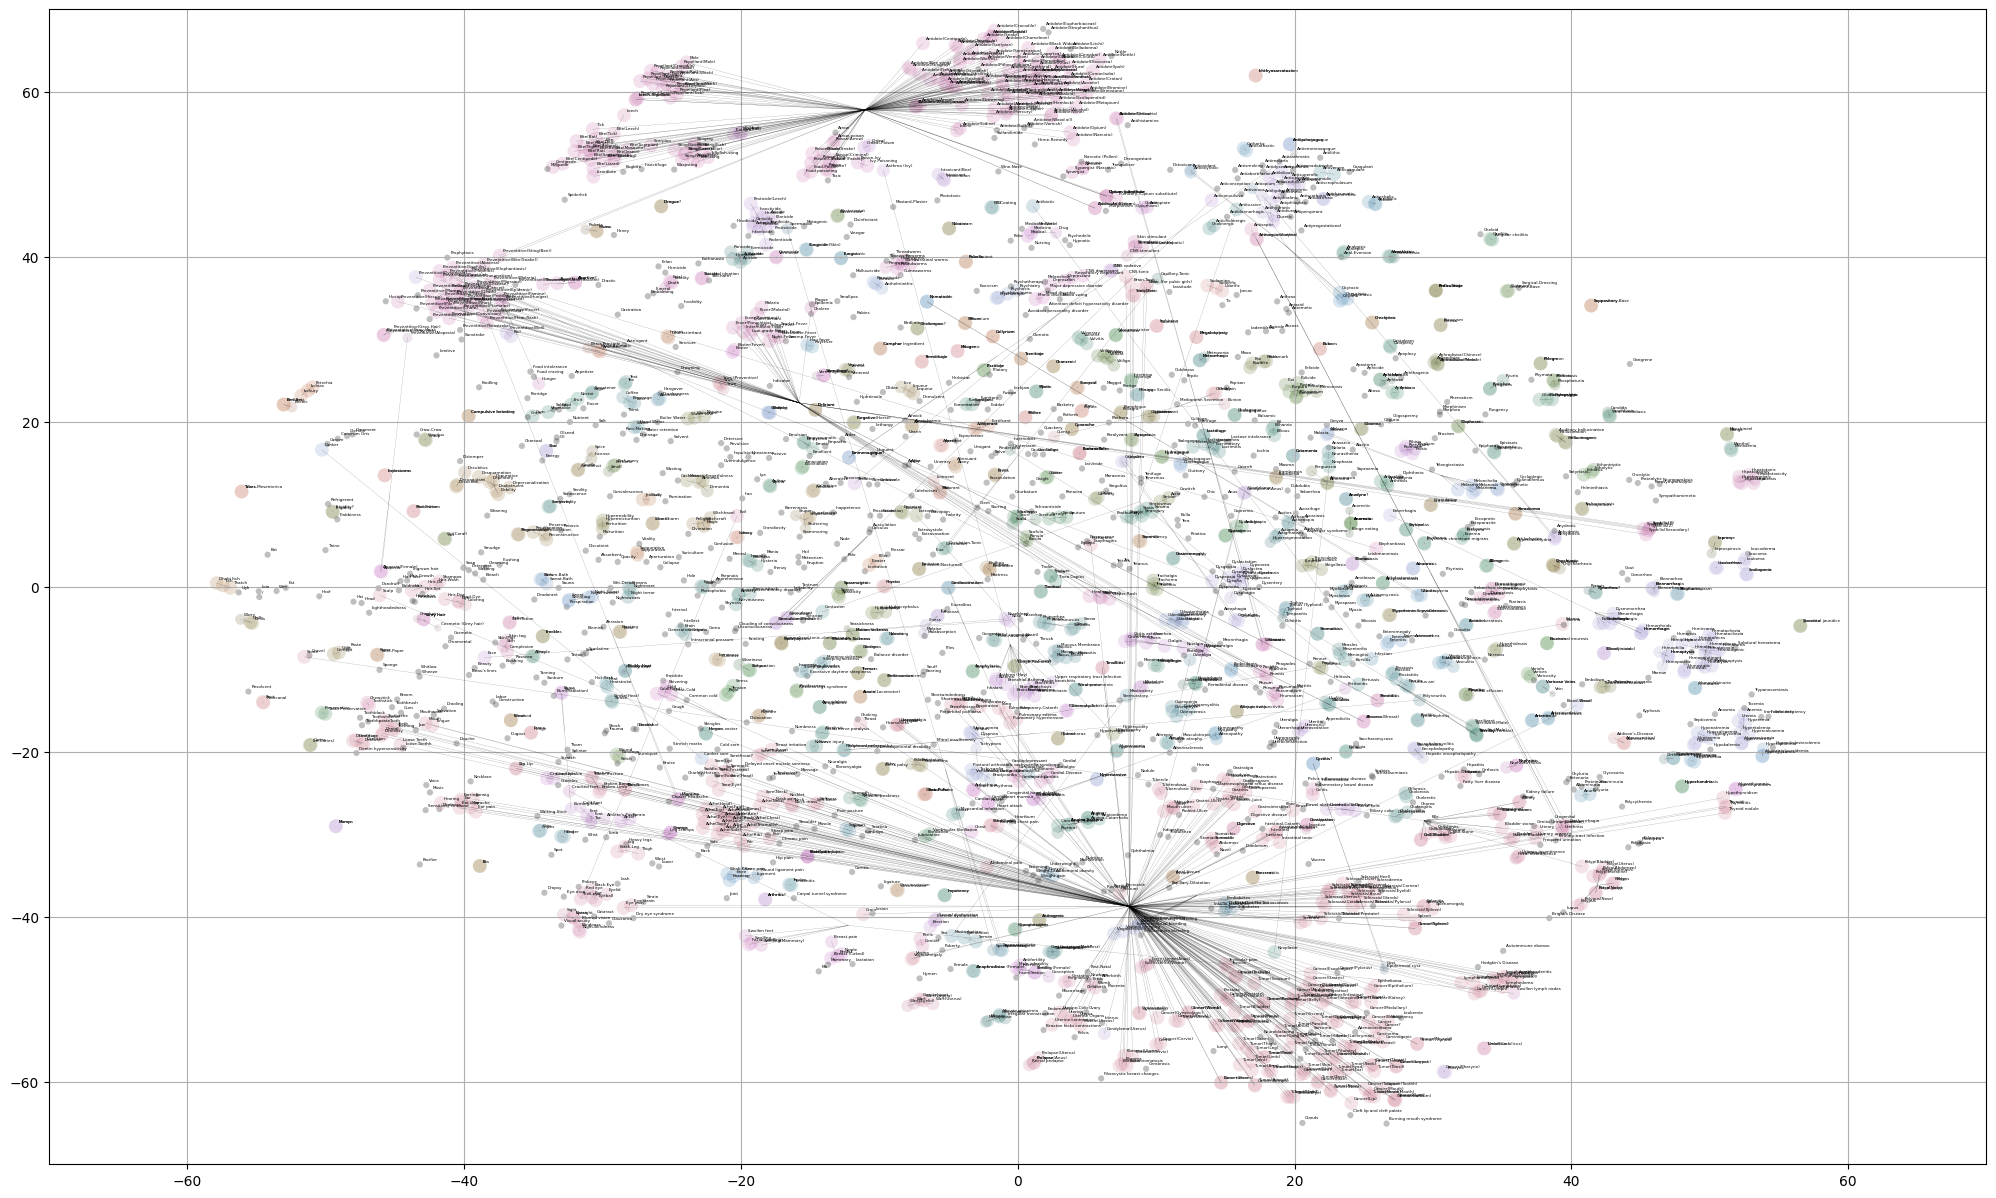

In [27]:
plt.figure(figsize=(25,15))
plt.grid(visible=True)

clusterer = hdbscan.HDBSCAN(min_samples = 1, min_cluster_size=2, 
                            cluster_selection_epsilon=.75, 
                            metric='precomputed').fit(df_dist_1)

cluster_df = pd.DataFrame(clusterer.labels_, columns=["label"])
cluster_df[["x", "y"]] = pd.DataFrame(projection, columns=["x", "y"]) 

n_labels = len(set(clusterer.labels_))

color_palette = sns.color_palette('husl', n_labels)
cluster_colors = [color_palette[x] if x >= 0
                  else (0, 0, 0)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_ * 0.5)]
cluster_prob = clusterer.probabilities_ * 100
cluster_prob[cluster_prob == 0] = 20
plt.scatter(*projection.T, s=cluster_prob , linewidth=0, c=cluster_member_colors, alpha=0.25)

# draw connecting lines
for label_group in cluster_df.label.unique():
    if label_group == -1:
        continue

    points = cluster_df[cluster_df.label == label_group][["x", "y"]].values
    fake_centroids = points.mean(axis = 0)

    for i, point in enumerate(points):

        x = [point[0], fake_centroids[0]]
        y = [point[1], fake_centroids[1]]
        plt.plot(x, y, linewidth=.15, c="black", alpha=.5)

for i, coords in enumerate(projection):

    (x, y) = coords
    label = dict_symptom[i]

    plt.annotate(label, 
                (x,y), 
                textcoords="offset points",
                xytext=(2,3), 
                ha='left', 
                fontsize=3) 

plt.ylim(-70, 70)
plt.xlim(-70, 70)

plt.show()

The connecting lines confirm that, similarly to the soft clustering results, a single cluster can be really spread out and include points that seem far away - and might even be separated by other clusters in-between - in this 2D projection.

#### Zoom In:

We decide to take a closer look at one of those spread-out clusters:

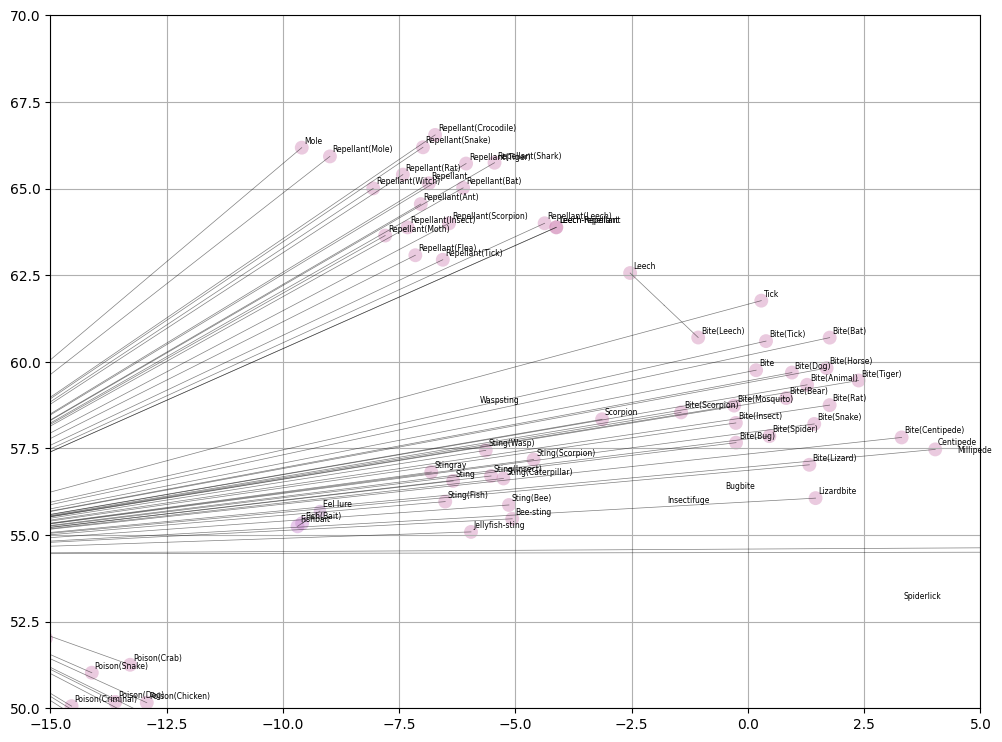

In [23]:
plt.figure(figsize=(12,9))
plt.grid(visible=True)

clusterer = hdbscan.HDBSCAN(min_samples = 1, min_cluster_size=2, 
                            cluster_selection_epsilon=.75, 
                            metric='precomputed').fit(df_dist_1)

cluster_df = pd.DataFrame(clusterer.labels_, columns=["label"])
cluster_df[["x", "y"]] = pd.DataFrame(projection, columns=["x", "y"]) 

n_labels = len(set(clusterer.labels_))

color_palette = sns.color_palette('husl', n_labels)
cluster_colors = [color_palette[x] if x >= 0
                  else (0, 0, 0)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_ * 0.5)]
cluster_prob = clusterer.probabilities_ * 100
plt.scatter(*projection.T, s=cluster_prob , linewidth=0, c=cluster_member_colors, alpha=0.45)

# draw connecting lines
for label_group in cluster_df.label.unique():
    if label_group == -1:
        continue

    points = cluster_df[cluster_df.label == label_group][["x", "y"]].values
    fake_centroids = points.mean(axis = 0)

    for i, point in enumerate(points):

        x = [point[0], fake_centroids[0]]
        y = [point[1], fake_centroids[1]]
        plt.plot(x, y, linewidth=.5, c="black", alpha=.5)

for i, coords in enumerate(projection):

    (x, y) = coords
    label = dict_symptom[i]

    plt.annotate(label,
                (x,y), 
                textcoords="offset points", 
                xytext=(2,3),
                ha='left',
                fontsize=5.5) 
    
plt.ylim(50, 70)
plt.xlim(-15, 5)

plt.show()

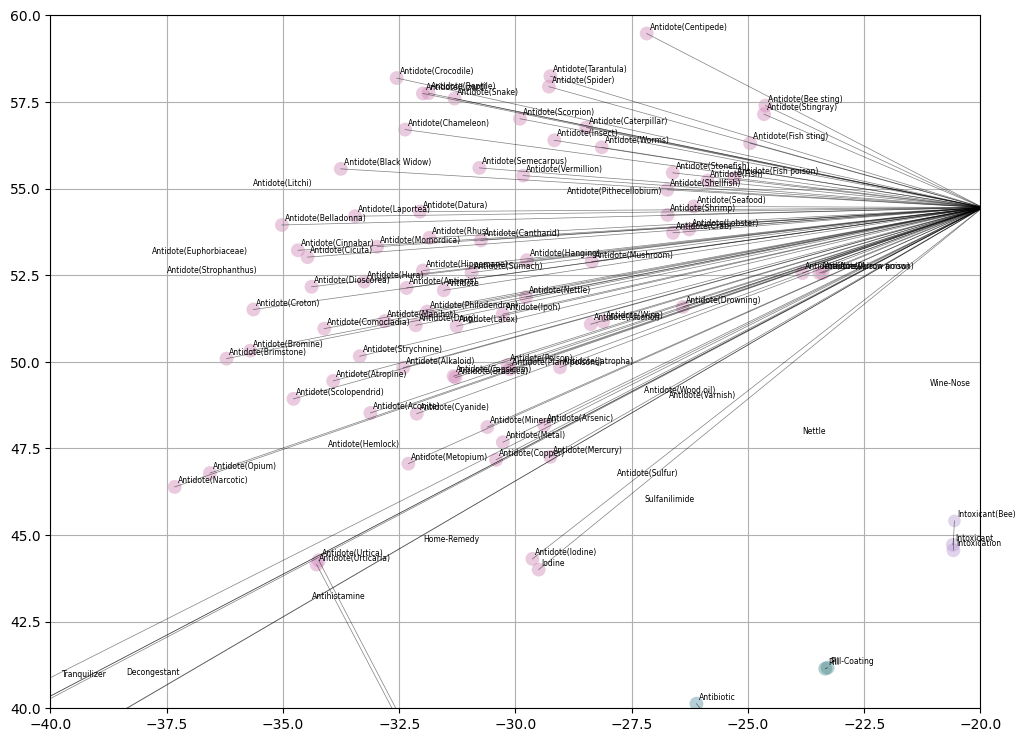

In [20]:
plt.figure(figsize=(12,9))
plt.grid(visible=True)

clusterer = hdbscan.HDBSCAN(min_samples = 1, min_cluster_size=2, 
                            cluster_selection_epsilon=.75, 
                            metric='precomputed').fit(df_dist_1)

cluster_df = pd.DataFrame(clusterer.labels_, columns=["label"])
cluster_df[["x", "y"]] = pd.DataFrame(projection, columns=["x", "y"]) 

n_labels = len(set(clusterer.labels_))

color_palette = sns.color_palette('husl', n_labels)
cluster_colors = [color_palette[x] if x >= 0
                  else (0, 0, 0)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_ * 0.5)]
cluster_prob = clusterer.probabilities_ * 100
plt.scatter(*projection.T, s=cluster_prob , linewidth=0, c=cluster_member_colors, alpha=0.45)

# draw connecting lines
for label_group in cluster_df.label.unique():
    if label_group == -1:
        continue

    points = cluster_df[cluster_df.label == label_group][["x", "y"]].values
    fake_centroids = points.mean(axis = 0)

    for i, point in enumerate(points):

        x = [point[0], fake_centroids[0]]
        y = [point[1], fake_centroids[1]]
        plt.plot(x, y, linewidth=.5, c="black", alpha=.5)

for i, coords in enumerate(projection):

    (x, y) = coords
    label = dict_symptom[i]

    plt.annotate(label,
                (x,y), 
                textcoords="offset points", 
                xytext=(2,3),
                ha='left',
                fontsize=5.5) 

plt.ylim(40, 60)
plt.xlim(-40, -20)

plt.show()

Upon closer inspection we realise that they deal with similar medicinal uses, specifically antidotes, repellants and preventives dealing with animal bites, stings and similar issues.

## Visualising a Singular Distance Graph:

We can also use the distance matrix to create visualisations. It is especially interesting to visualise the linear distance graph from the point of view of a single initial data point, i.e. a symptom or activity. For a first example, we take a look at the seconds entry in the dictionary, which is the row containing distance vectors for the activity "Abdomen":

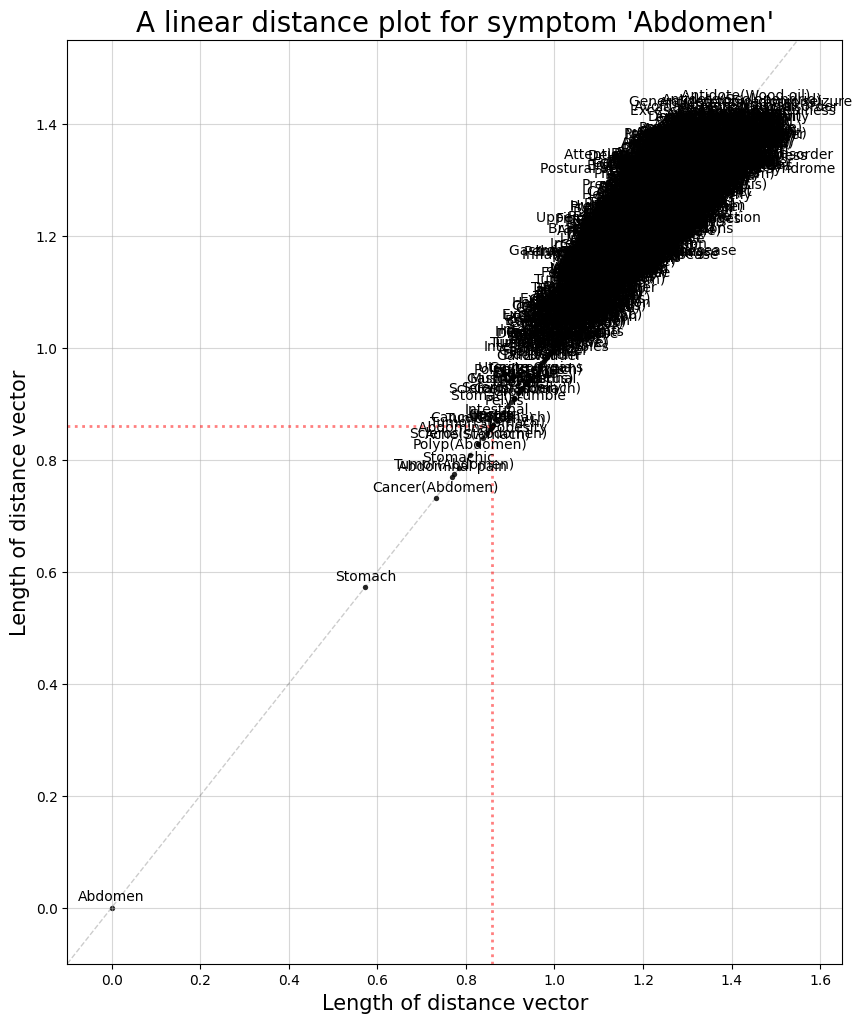

In [29]:
target_i = 1

plt.figure(figsize=(10,12))
plt.grid(visible=True, alpha = .5)

plt.scatter(df_dist_1[target_i], df_dist_1[target_i], s=15, linewidth=0, c="black", alpha=0.85)

x1, y1 = [-0.1, 0.86], [0.86, 0.86]
x2, y2 = [0.86, 0.86], [-0.1, 0.86]
plt.plot(x1, y1, x2, y2, linestyle = 'dotted', linewidth = 2, c = "red", alpha = .5)

x3, y3 = [-0.1, 1.55], [-0.1, 1.55]
plt.plot(x3, y3, linestyle = 'dashed', linewidth = 1, c = "black", alpha = .2)


for i, vector in enumerate(df_dist_1[target_i]):

    x = vector
    y = vector

    label = dict_symptom[i]

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,5), 
                 ha='center', 
                 fontsize=10) 

plt.ylim(-0.1, 1.55)
# plt.ylim(-0.1, 1.65)
plt.xlim(-0.1, 1.65)

plt.title(f"A linear distance plot for symptom '{dict_symptom[target_i]}'", fontsize=20)
plt.xlabel("Length of distance vector", fontsize=15)
plt.ylabel("Length of distance vector", fontsize=15)

plt.show()

Our second example is found at index 1442, which is the row containing distance vectors for one of the most isolated activities, "Resolvent":

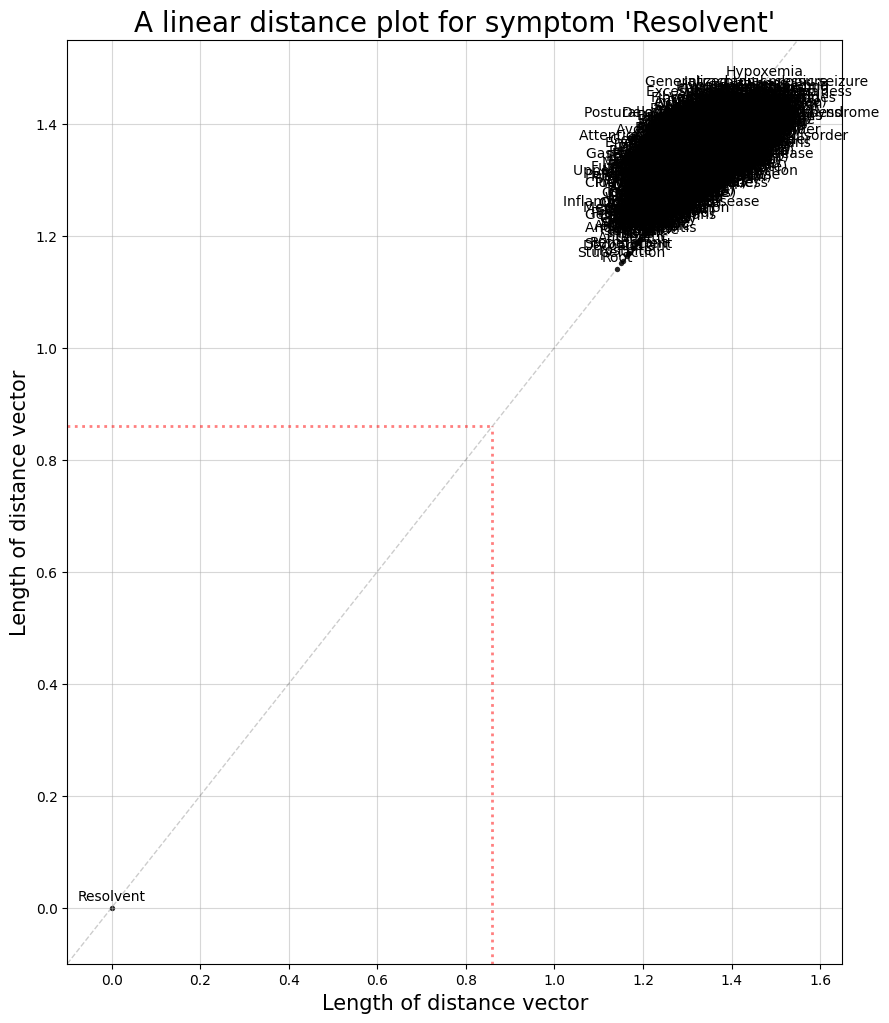

In [30]:
target_i = 1442

plt.figure(figsize=(10,12))
plt.grid(visible=True, alpha = .5)

plt.scatter(df_dist_1[target_i], df_dist_1[target_i], s=15, linewidth=0, c="black", alpha=0.85)

x1, y1 = [-0.1, 0.86], [0.86, 0.86]
x2, y2 = [0.86, 0.86], [-0.1, 0.86]
plt.plot(x1, y1, x2, y2, linestyle = 'dotted', linewidth = 2, c = "red", alpha = .5)

x3, y3 = [-0.1, 1.55], [-0.1, 1.55]
plt.plot(x3, y3, linestyle = 'dashed', linewidth = 1, c = "black", alpha = .2)


for i, vector in enumerate(df_dist_1[target_i]):

    x = vector
    y = vector

    label = dict_symptom[i]

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,5), 
                 ha='center', 
                 fontsize=10) 

plt.ylim(-0.1, 1.55)
# plt.ylim(-0.1, 1.65)
plt.xlim(-0.1, 1.65)

plt.title(f"A linear distance plot for symptom '{dict_symptom[target_i]}'", fontsize=20)
plt.xlabel("Length of distance vector", fontsize=15)
plt.ylabel("Length of distance vector", fontsize=15)

plt.show()

As a reminder: this merely indicates the relative distance of the term "Resolvent" to all other terms in the activity and symptom embeddings dataframe - but by no way does it mean that all the other terms, clumped as they are at the top right corner, are all close to one another. 

## Closing Remarks:

The data we worked with possesses an inherently high dimensional complexity, and therefore all visualisations in 2D space can be quite misleading. As a general reminder, they are a projection and the displayed distances only tell a part of the story.

This became more obvious when visualising the clusters identified by HDBSCAN*. We generated the maximum amount of clusters possible, and while it looks like sometimes extremely distant data points were clustered together, when we took a look at the specific terms matched, their semantic proximity would become obvious (at least for the most part). This also explains why we were not entirely satisfied with the results provided by the match-dictionary generated from these clusters, as our custom Python script that did not use clusters ended up providing better results.